In [45]:
import sklearn
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

#loaded required libraries

In [20]:
micro = pd.read_csv('D:\Flip Robo\Micro Credit Project/Data File.csv')
micro

,Unnamed: 0,label,msisdn,aon,daily_decr30,daily_decr90,rental30,rental90,last_rech_date_ma,last_rech_date_da,...,maxamnt_loans30,medianamnt_loans30,cnt_loans90,amnt_loans90,maxamnt_loans90,medianamnt_loans90,payback30,payback90,pcircle,pdate
0,1,0,21408I70789,272.0,3055.050000,3065.150000,220.13,260.13,2.0,0.0,...,6.0,0.0,2.0,12,6,0.0,29.000000,29.000000,UPW,2016-07-20
1,2,1,76462I70374,712.0,12122.000000,12124.750000,3691.26,3691.26,20.0,0.0,...,12.0,0.0,1.0,12,12,0.0,0.000000,0.000000,UPW,2016-08-10
2,3,1,17943I70372,535.0,1398.000000,1398.000000,900.13,900.13,3.0,0.0,...,6.0,0.0,1.0,6,6,0.0,0.000000,0.000000,UPW,2016-08-19
3,4,1,55773I70781,241.0,21.228000,21.228000,159.42,159.42,41.0,0.0,...,6.0,0.0,2.0,12,6,0.0,0.000000,0.000000,UPW,2016-06-06
4,5,1,03813I82730,947.0,150.619333,150.619333,1098.90,1098.90,4.0,0.0,...,6.0,0.0,7.0,42,6,0.0,2.333333,2.333333,UPW,2016-06-22
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
209588,209589,1,22758I85348,404.0,151.872333,151.872333,1089.19,1089.19,1.0,0.0,...,6.0,0.0,2.0,12,6,0.0,1.000000,1.000000,UPW,2016-06-17
209589,209590,1,95583I84455,1075.0,36.936000,36.936000,1728.36,1728.36,4.0,0.0,...,6.0,0.0,3.0,18,6,0.0,1.000000,1.000000,UPW,2016-06-12
209590,209591,1,28556I85350,1013.0,11843.111667,11904.350000,5861.83,8893.20,3.0,0.0,...,12.0,0.0,6.0,54,12,0.0,4.000000,3.833333,UPW,2016-07-29
209591,209592,1,59712I82733,1732.0,12488.228333,12574.370000,411.83,984.58,2.0,38.0,...,12.0,0.0,3.0,24,12,0.0,0.000000,10.500000,UPW,2016-07-25


In [21]:
micro.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 209593 entries, 0 to 209592
Data columns (total 37 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   Unnamed: 0            209593 non-null  int64  
 1   label                 209593 non-null  int64  
 2   msisdn                209593 non-null  object 
 3   aon                   209593 non-null  float64
 4   daily_decr30          209593 non-null  float64
 5   daily_decr90          209593 non-null  float64
 6   rental30              209593 non-null  float64
 7   rental90              209593 non-null  float64
 8   last_rech_date_ma     209593 non-null  float64
 9   last_rech_date_da     209593 non-null  float64
 10  last_rech_amt_ma      209593 non-null  int64  
 11  cnt_ma_rech30         209593 non-null  int64  
 12  fr_ma_rech30          209593 non-null  float64
 13  sumamnt_ma_rech30     209593 non-null  float64
 14  medianamnt_ma_rech30  209593 non-null  float64
 15  

label	= Flag indicating whether the user paid back the credit amount within 5 days of issuing the loan   {1:success, 0:failure}	
msisdn	= mobile number of user	
aon	= age on cellular network in days	
daily_decr30	= Daily amount spent from main account, averaged over last 30 days (in Indonesian Rupiah)	
daily_decr90	= Daily amount spent from main account, averaged over last 90 days (in Indonesian Rupiah)	
rental30 = Average main account balance over last 30 days	Unsure of given definition
rental90 = Average main account balance over last 90 days	Unsure of given definition
last_rech_date_ma = Number of days till last recharge of main account	
last_rech_date_da = Number of days till last recharge of data account	
last_rech_amt_ma = Amount of last recharge of main account (in Indonesian Rupiah)	
cnt_ma_rech30 = Number of times main account got recharged in last 30 days	
fr_ma_rech30 = Frequency of main account recharged in last 30 days	Unsure of given definition
sumamnt_ma_rech30 =	Total amount of recharge in main account over last 30 days (in Indonesian Rupiah)	
medianamnt_ma_rech30 = Median of amount of recharges done in main account over last 30 days at user level (in Indonesian Rupiah)	
medianmarechprebal30 = Median of main account balance just before recharge in last 30 days at user level (in Indonesian Rupiah)	
cnt_ma_rech90 = Number of times main account got recharged in last 90 days	
fr_ma_rech90 = Frequency of main account recharged in last 90 days	Unsure of given definition
sumamnt_ma_rech90 = Total amount of recharge in main account over last 90 days (in Indonasian Rupiah)	
medianamnt_ma_rech90 = Median of amount of recharges done in main account over last 90 days at user level (in Indonasian Rupiah)	
medianmarechprebal90 = Median of main account balance just before recharge in last 90 days at user level (in Indonasian Rupiah)	
cnt_da_rech30 = Number of times data account got recharged in last 30 days	
fr_da_rech30 = Frequency of data account recharged in last 30 days	
cnt_da_rech90 = Number of times data account got recharged in last 90 days	
fr_da_rech90 = Frequency of data account recharged in last 90 days	
cnt_loans30 = Number of loans taken by user in last 30 days	
amnt_loans30 = Total amount of loans taken by user in last 30 days	
maxamnt_loans30 = maximum amount of loan taken by the user in last 30 days	There are only two options: 5 & 10 Rs., for which the user needs to pay back 6 & 12 Rs. respectively
medianamnt_loans30 = Median of amounts of loan taken by the user in last 30 days	
cnt_loans90	= Number of loans taken by user in last 90 days	
amnt_loans90 = Total amount of loans taken by user in last 90 days	
maxamnt_loans90 = maximum amount of loan taken by the user in last 90 days	
medianamnt_loans90 = Median of amounts of loan taken by the user in last 90 days	
payback30 = Average payback time in days over last 30 days	
payback90 = Average payback time in days over last 90 days	
pcircle = telecom circle	
pdate = date	

In [22]:
micro['pcircle'].value_counts()

UPW    209593
Name: pcircle, dtype: int64

In [23]:
micro.drop(['msisdn'],axis=1,inplace=True)
micro.drop(['pcircle'],axis=1,inplace=True)
micro.drop(['pdate'],axis=1,inplace=True)
micro.drop(['Unnamed: 0'],axis=1,inplace=True)

We dropped columns that contain all unique or mostly same values.

In [24]:
print(micro.isnull().values.any())
print(micro.isnull().sum())

False
label                   0
aon                     0
daily_decr30            0
daily_decr90            0
rental30                0
rental90                0
last_rech_date_ma       0
last_rech_date_da       0
last_rech_amt_ma        0
cnt_ma_rech30           0
fr_ma_rech30            0
sumamnt_ma_rech30       0
medianamnt_ma_rech30    0
medianmarechprebal30    0
cnt_ma_rech90           0
fr_ma_rech90            0
sumamnt_ma_rech90       0
medianamnt_ma_rech90    0
medianmarechprebal90    0
cnt_da_rech30           0
fr_da_rech30            0
cnt_da_rech90           0
fr_da_rech90            0
cnt_loans30             0
amnt_loans30            0
maxamnt_loans30         0
medianamnt_loans30      0
cnt_loans90             0
amnt_loans90            0
maxamnt_loans90         0
medianamnt_loans90      0
payback30               0
payback90               0
dtype: int64


We can see that there are no null values in dataset.

In [25]:
micro.describe()

,label,aon,daily_decr30,daily_decr90,rental30,rental90,last_rech_date_ma,last_rech_date_da,last_rech_amt_ma,cnt_ma_rech30,...,cnt_loans30,amnt_loans30,maxamnt_loans30,medianamnt_loans30,cnt_loans90,amnt_loans90,maxamnt_loans90,medianamnt_loans90,payback30,payback90
count,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,...,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000
mean,0.875177,8112.343445,5381.402289,6082.515068,2692.581910,3483.406534,3755.847800,3712.202921,2064.452797,3.978057,...,2.758981,17.952021,274.658747,0.054029,18.520919,23.645398,6.703134,0.046077,3.398826,4.321485
std,0.330519,75696.082531,9220.623400,10918.812767,4308.586781,5770.461279,53905.892230,53374.833430,2370.786034,4.256090,...,2.554502,17.379741,4245.264648,0.218039,224.797423,26.469861,2.103864,0.200692,8.813729,10.308108
min,0.000000,-48.000000,-93.012667,-93.012667,-23737.140000,-24720.580000,-29.000000,-29.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,246.000000,42.440000,42.692000,280.420000,300.260000,1.000000,0.000000,770.000000,1.000000,...,1.000000,6.000000,6.000000,0.000000,1.000000,6.000000,6.000000,0.000000,0.000000,0.000000
50%,1.000000,527.000000,1469.175667,1500.000000,1083.570000,1334.000000,3.000000,0.000000,1539.000000,3.000000,...,2.000000,12.000000,6.000000,0.000000,2.000000,12.000000,6.000000,0.000000,0.000000,1.666667
75%,1.000000,982.000000,7244.000000,7802.790000,3356.940000,4201.790000,7.000000,0.000000,2309.000000,5.000000,...,4.000000,24.000000,6.000000,0.000000,5.000000,30.000000,6.000000,0.000000,3.750000,4.500000
max,1.000000,999860.755168,265926.000000,320630.000000,198926.110000,200148.110000,998650.377733,999171.809410,55000.000000,203.000000,...,50.000000,306.000000,99864.560864,3.000000,4997.517944,438.000000,12.000000,3.000000,171.500000,171.500000


We could see that there is lot of difference between 50% quartile and mean values in many columns which tells us that there is lot of skewness in our data and also there might be outliers in our data.

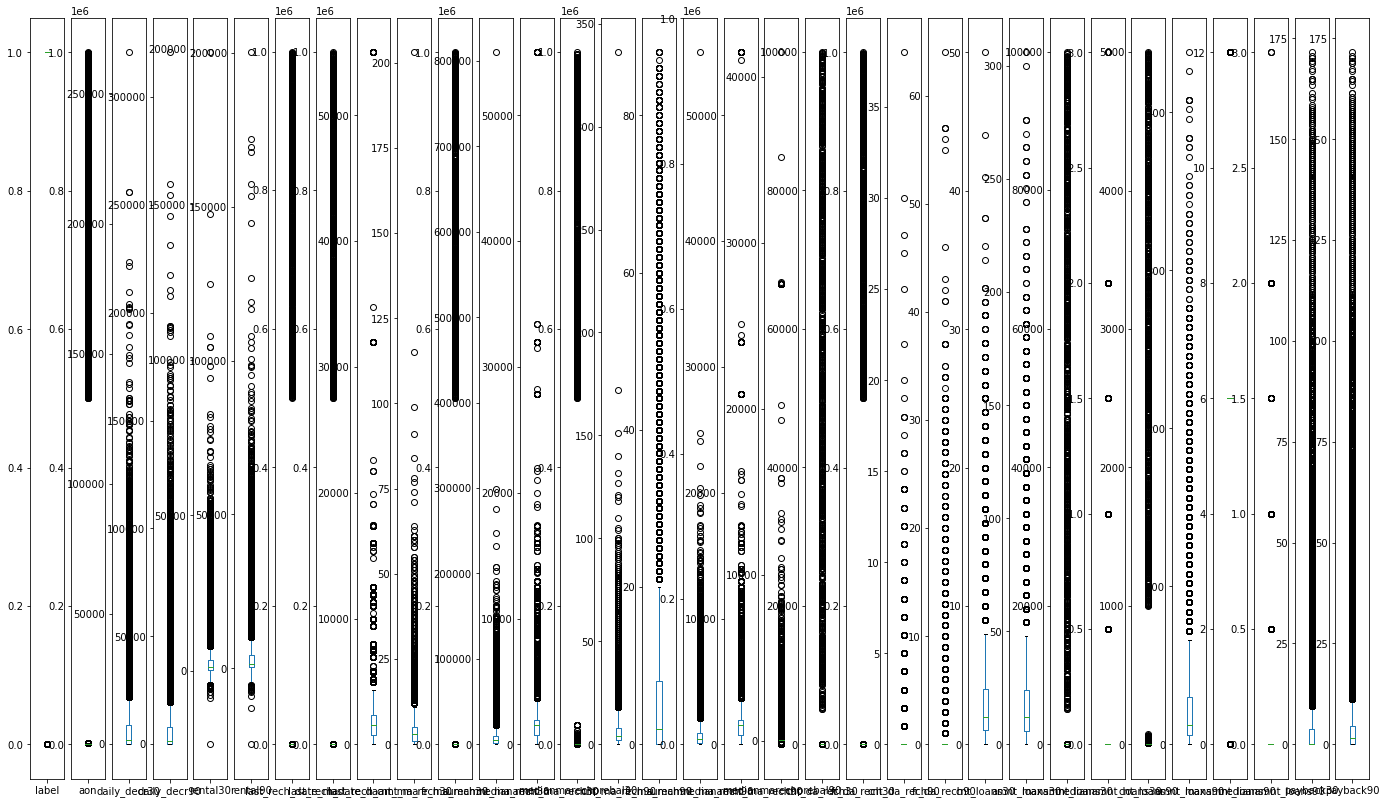

In [26]:
micro.plot(kind='box',subplots=True,figsize=[24,14])
plt.show()

In [27]:
from scipy import stats
z_scores = stats.zscore(micro)
z_scores

array([[-2.64789583, -0.10357685, -0.25229941, ..., -0.22959366,
         2.9046997 ,  2.39409346],
       [ 0.37765836, -0.09776412,  0.73103667, ..., -0.22959366,
        -0.38562959, -0.41923266],
       [ 0.37765836, -0.10010243, -0.43201111, ..., -0.22959366,
        -0.38562959, -0.41923266],
       ...,
       [ 0.37765836, -0.09378769,  0.70079045, ..., -0.22959366,
         0.06820893, -0.04735622],
       [ 0.37765836, -0.08428915,  0.77075515, ..., -0.22959366,
        -0.38562959,  0.59938541],
       [ 0.37765836, -0.08628398, -0.09674426, ..., -0.22959366,
        -0.38562959, -0.41923266]])

In [28]:
abs_z_scores = np.abs(z_scores)
micro_new = (abs_z_scores < 3).all(axis=1)
micro_new = micro[micro_new]

In [29]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
temp_scaler=scaler.fit_transform(micro_new)
new_micro=pd.DataFrame(temp_scaler,columns=micro_new.columns)

In [30]:
new_micro.skew()

label                   -2.090315
aon                      0.957902
daily_decr30             1.963747
daily_decr90             2.077637
rental30                 2.194889
rental90                 2.244866
last_rech_date_ma        3.099484
last_rech_date_da       10.384887
last_rech_amt_ma         2.125356
cnt_ma_rech30            1.175157
fr_ma_rech30             2.005139
sumamnt_ma_rech30        1.634226
medianamnt_ma_rech30     2.326312
medianmarechprebal30    10.538891
cnt_ma_rech90            1.321145
fr_ma_rech90             1.985567
sumamnt_ma_rech90        1.707309
medianamnt_ma_rech90     2.373140
medianmarechprebal90     3.692650
cnt_da_rech30           50.760988
fr_da_rech30             0.000000
cnt_da_rech90            6.934340
fr_da_rech90             0.000000
cnt_loans30              1.465414
amnt_loans30             1.441450
maxamnt_loans30         53.470571
medianamnt_loans30       5.355423
cnt_loans90              1.708977
amnt_loans90             1.695156
maxamnt_loans9

In [31]:
from sklearn.preprocessing import power_transform
micro_skew = power_transform(micro)
micro_skew = pd.DataFrame(micro_new,columns = micro.columns)

In [32]:
corr_mat = micro.corr()
corr_mat

,label,aon,daily_decr30,daily_decr90,rental30,rental90,last_rech_date_ma,last_rech_date_da,last_rech_amt_ma,cnt_ma_rech30,...,cnt_loans30,amnt_loans30,maxamnt_loans30,medianamnt_loans30,cnt_loans90,amnt_loans90,maxamnt_loans90,medianamnt_loans90,payback30,payback90
label,1.000000,-0.003785,0.168298,0.166150,0.058085,0.075521,0.003728,0.001711,0.131804,0.237331,...,0.196283,0.197272,0.000248,0.044589,0.004733,0.199788,0.084144,0.035747,0.048336,0.049183
aon,-0.003785,1.000000,0.001104,0.000374,-0.000960,-0.000790,0.001692,-0.001693,0.004256,-0.003148,...,-0.001826,-0.001726,-0.002764,0.004664,-0.000611,-0.002319,-0.001191,0.002771,0.001940,0.002203
daily_decr30,0.168298,0.001104,1.000000,0.977704,0.442066,0.458977,0.000487,-0.001636,0.275837,0.451385,...,0.366116,0.471492,-0.000028,-0.011610,0.008962,0.563496,0.400199,-0.037305,0.026915,0.047175
daily_decr90,0.166150,0.000374,0.977704,1.000000,0.434685,0.471730,0.000908,-0.001886,0.264131,0.426707,...,0.340387,0.447869,0.000025,-0.005591,0.009446,0.567204,0.397251,-0.034686,0.019400,0.040800
rental30,0.058085,-0.000960,0.442066,0.434685,1.000000,0.955237,-0.001095,0.003261,0.127271,0.233343,...,0.180203,0.233453,-0.000864,-0.016482,0.004012,0.298943,0.234211,-0.035489,0.072974,0.095147
rental90,0.075521,-0.000790,0.458977,0.471730,0.955237,1.000000,-0.001688,0.002794,0.121416,0.230260,...,0.171595,0.231906,-0.001411,-0.009467,0.005141,0.327436,0.251029,-0.034122,0.067110,0.099501
last_rech_date_ma,0.003728,0.001692,0.000487,0.000908,-0.001095,-0.001688,1.000000,0.001790,-0.000147,0.004311,...,0.001193,0.000903,0.000928,0.001835,-0.000225,0.000870,-0.001123,0.002771,-0.002233,-0.001583
last_rech_date_da,0.001711,-0.001693,-0.001636,-0.001886,0.003261,0.002794,0.001790,1.000000,-0.000149,0.001549,...,0.000380,0.000536,0.000503,0.000061,-0.000972,0.000519,0.001524,-0.002239,0.000077,0.000417
last_rech_amt_ma,0.131804,0.004256,0.275837,0.264131,0.127271,0.121416,-0.000147,-0.000149,1.000000,-0.002662,...,-0.027612,0.008502,0.001000,0.028370,0.000093,0.014067,0.148460,0.021004,-0.027369,-0.014260
cnt_ma_rech30,0.237331,-0.003148,0.451385,0.426707,0.233343,0.230260,0.004311,0.001549,-0.002662,1.000000,...,0.765802,0.752296,0.000109,-0.067011,0.014703,0.685257,0.174104,-0.071451,0.043617,0.017362


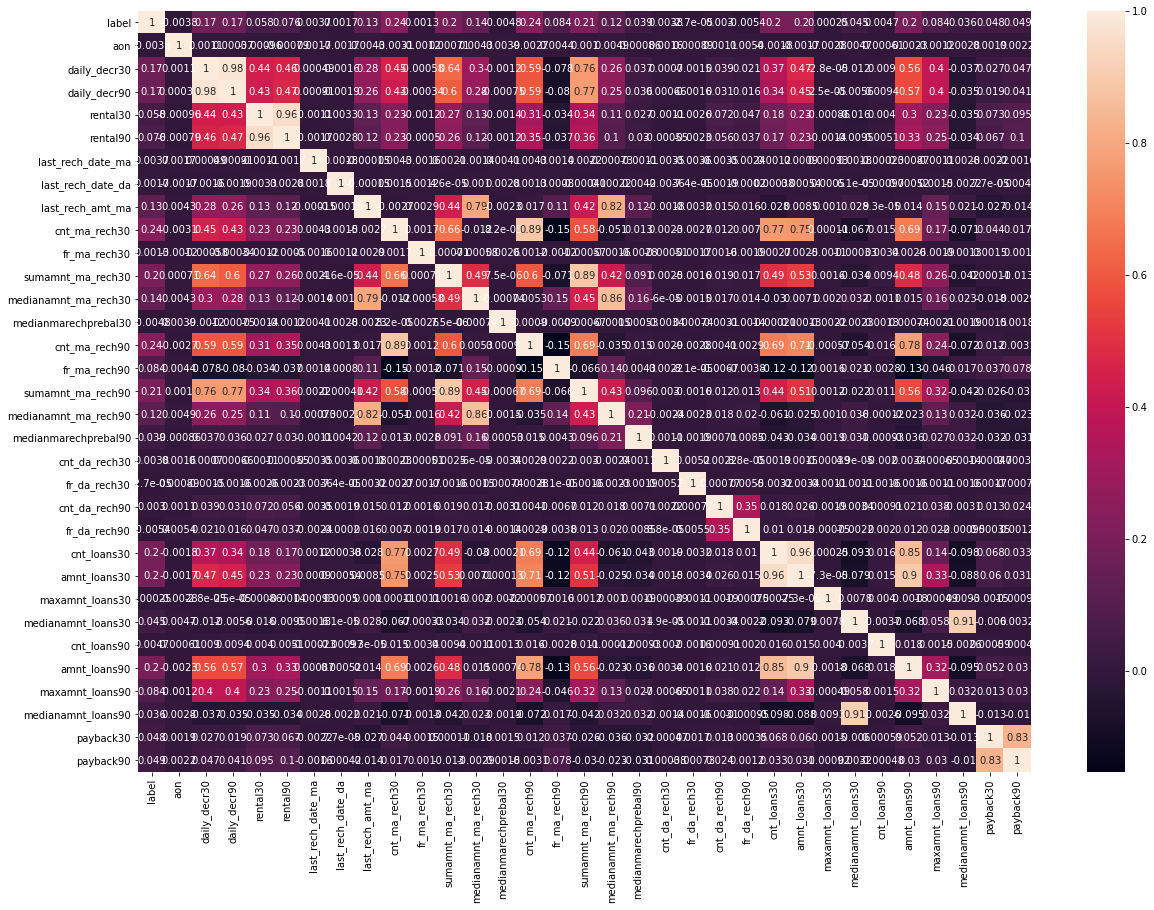

In [33]:
plt.figure(figsize=[20,14])
sns.heatmap(corr_mat,annot=True)
plt.title = ('Correlation Matrix')
plt.show()

In [34]:
corr_target = micro.corrwith(micro['label'],axis=0)
corr_target

label                   1.000000
aon                    -0.003785
daily_decr30            0.168298
daily_decr90            0.166150
rental30                0.058085
rental90                0.075521
last_rech_date_ma       0.003728
last_rech_date_da       0.001711
last_rech_amt_ma        0.131804
cnt_ma_rech30           0.237331
fr_ma_rech30            0.001330
sumamnt_ma_rech30       0.202828
medianamnt_ma_rech30    0.141490
medianmarechprebal30   -0.004829
cnt_ma_rech90           0.236392
fr_ma_rech90            0.084385
sumamnt_ma_rech90       0.205793
medianamnt_ma_rech90    0.120855
medianmarechprebal90    0.039300
cnt_da_rech30           0.003827
fr_da_rech30           -0.000027
cnt_da_rech90           0.002999
fr_da_rech90           -0.005418
cnt_loans30             0.196283
amnt_loans30            0.197272
maxamnt_loans30         0.000248
medianamnt_loans30      0.044589
cnt_loans90             0.004733
amnt_loans90            0.199788
maxamnt_loans90         0.084144
medianamnt

In [35]:
x=micro_skew.drop(['label'],axis=1)
y=micro_skew['label']

In [36]:
!pip3 install imblearn

In [37]:
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler
from collections import Counter

In [38]:
print(Counter(y))

Counter({1: 139065, 0: 22400})


In [39]:
# instantiating the random oversampler 
ros = RandomOverSampler()
# resampling X, y
x_ros, y_ros = ros.fit_resample(x, y)

# new class distribution 
print(Counter(y_ros))

Counter({0: 139065, 1: 139065})


In [40]:
x_train,x_test,y_train,y_test = train_test_split(x_ros,y_ros,test_size=0.25, random_state=15)

In [62]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(x_train,y_train)
lr_predict =lr.predict(x_test)
lr_auc = roc_auc_score(y_test, lr_predict)
print('Logistic: ROC AUC=%.3f' % (lr_auc))
lr_fpr, lr_tpr, _= roc_curve(y_test, lr_predict)
lr_accuracy = accuracy_score(y_test, lr_predict)
print(lr_accuracy)

Logistic: ROC AUC=0.749
0.7487955359325787


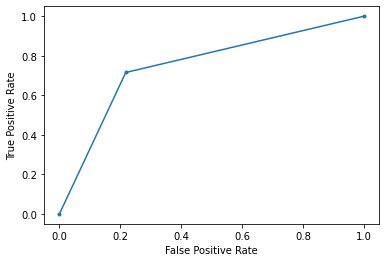

In [50]:
plt.plot(lr_fpr, lr_tpr, marker='.', label='Logistic')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()

In [57]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb.fit(x_train, y_train)
gnb_predict = gnb.predict(x_test)
gnb_auc = roc_auc_score(y_test, lr_predict)
print('GaussianNB: ROC AUC=%.3f' % (gnb_auc))
gnb_accuracy_score = accuracy_score(y_test, gnb_predict)
gnb_fpr, gnb_tpr, _ = roc_curve(y_test, gnb_predict)
print(gnb_accuracy_score)

GaussianNB: ROC AUC=0.749
0.7208951145499259


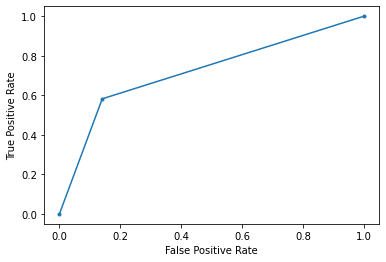

In [69]:
plt.plot(gnb_fpr, gnb_tpr, marker='.', label='GaussianNB')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()

In [59]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier(max_depth=10)
dt.fit(x_train,y_train)
dt_predict = dt.predict(x_test)
dt_auc = roc_auc_score(y_test, lr_predict)
print('Decision Tree: ROC AUC=%.3f' % (dt_auc))
dt_accuracy_score = accuracy_score(y_test,dt_predict)
print(dt_accuracy_score)
dt_fpr, dt_tpr, _ = roc_curve(y_test, dt_predict)

Decision Tree: ROC AUC=0.749
0.8208045100887349


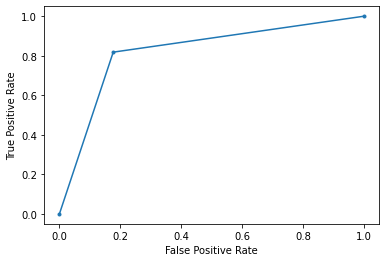

In [68]:
plt.plot(dt_fpr, dt_tpr, marker='.', label='Decision Tree Classifier')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()

In [65]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(max_depth=10)
rf.fit(x_train, y_train)
rf_predict = rf.predict(x_test)
rf_accuracy_score = accuracy_score(y_test,rf_predict)
rf_auc = roc_auc_score(y_test, rf_predict)
print('Random Forest: ROC AUC=%.3f' % (rf_auc))
rf_accuracy_score = accuracy_score(y_test,rf_predict)
print(rf_accuracy_score)
rf_fpr, rf_tpr, _ = roc_curve(y_test, rf_predict)

Random Forest: ROC AUC=0.823
0.8228035608991414


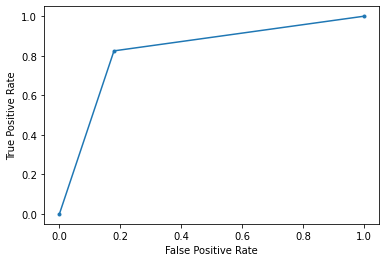

In [66]:
plt.plot(rf_fpr, rf_tpr, marker='.', label='Random Forest Classifier')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()

In [29]:
from sklearn.model_selection import cross_val_score
scr=cross_val_score(lr, x, y, cv=6)
print('Cross validation score of Logistic Regression : ',scr.mean())

Cross validation score of Logistic Regression :  0.8636670593387823


In [30]:
scr=cross_val_score(gnb, x, y, cv=6)
print('Cross validation score of Naive Bayes : ',scr.mean())

Cross validation score of Naive Bayes :  0.6460471378320553


In [31]:
scr=cross_val_score(dt, x, y, cv=6)
print('Cross validation score of Decision Tree : ',scr.mean())

Cross validation score of Decision Tree :  0.9018672873472027


In [32]:
scr=cross_val_score(dt, x, y, cv=6)
print('Cross validation score of Decision Tree : ',scr.mean())

Cross validation score of Decision Tree :  0.9019044445715777


From above cross validation, we can observe that Random Forest Classifier is having least difference between accuracy score and cross validation.

So, Random Forest Classifier with accuracy score of 82.28% is the best model

In [67]:
import joblib
joblib.dump(rf,'Micro_Credit.pkl')

['Micro_Credit.pkl']